# <font color='blue'>Mini-Projeto - Análise Exploratória em Conjunto de Dados do Kaggle</font>

## Download: https://www.kaggle.com/orgesleka/used-cars-database

### Neste notebook iremos utilizar dados da carros vendidos a partir do Ebay-Kleinanzeigen, para descobrir as principais carateristicas que ajudam a vender mais carros. O objetivo deste Mini-Projeto é fazer a preparação e analise exploratoria dos dados, investigando os problemas, como a necessidade de novas variaveis, falhas na organiazacao e necessidade de transformacao.

In [2]:
# Importando os pacotes 

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

In [3]:
# obter dados do autos.csv
data_path = "autos.csv"
df = pd.read_csv(data_path,encoding="latin-1")

In [4]:
df.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,...,postalCode,lastSeen,yearOfCreation,yearCrawled,monthOfCreation,monthCrawled,NoOfDaysOnline,NoOfHrsOnline,yearsOld,monthsOld
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Offer,480,test,Other,1993,manuell,0,...,70435,2016-04-07 03:16:57,2016,2016,March,March,14,3,23,11
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Offer,18300,test,coupe,2011,manuell,190,...,66954,2016-04-07 01:46:50,2016,2016,March,March,14,1,5,7
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Offer,9800,test,suv,2004,automatik,163,...,90480,2016-04-05 12:47:46,2016,2016,March,March,22,12,12,4
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÃRER,privat,Offer,1500,test,kleinwagen,2001,manuell,75,...,91074,2016-03-17 17:40:17,2016,2016,March,March,0,17,15,5
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Offer,3600,test,kleinwagen,2008,manuell,69,...,60437,2016-04-06 10:17:21,2016,2016,March,March,6,10,8,5


In [5]:
df.shape

(313687, 27)

In [6]:
df.describe()

,price,yearOfRegistration,powerPS,kilometer,postalCode,yearOfCreation,yearCrawled,NoOfDaysOnline,NoOfHrsOnline,yearsOld,monthsOld
count,313687.000000,313687.000000,313687.000000,313687.000000,313687.000000,313687.000000,313687.0,313687.000000,313687.000000,313687.000000,313687.000000
mean,3902.961863,2001.909231,109.564250,131435.778340,50349.563597,2015.999930,2016.0,8.543274,11.834207,14.090769,6.235187
std,4168.150636,6.803211,191.741685,34963.149957,25765.545682,0.008374,0.0,8.511917,6.504730,6.803211,3.454766
min,0.000000,1910.000000,0.000000,5000.000000,1067.000000,2015.000000,2016.0,0.000000,0.000000,0.000000,1.000000
25%,999.000000,1998.000000,68.000000,125000.000000,29640.000000,2016.000000,2016.0,2.000000,7.000000,10.000000,3.000000
50%,2490.000000,2002.000000,104.000000,150000.000000,49205.000000,2016.000000,2016.0,6.000000,12.000000,14.000000,6.000000
75%,5400.000000,2006.000000,140.000000,150000.000000,70794.000000,2016.000000,2016.0,13.000000,17.000000,18.000000,9.000000
max,28800.000000,2016.000000,20000.000000,150000.000000,99998.000000,2016.000000,2016.0,384.000000,23.000000,106.000000,11.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 313687 entries, 0 to 313686
Data columns (total 27 columns):
dateCrawled            313687 non-null object
name                   313687 non-null object
seller                 313687 non-null object
offerType              313687 non-null object
price                  313687 non-null int64
abtest                 313687 non-null object
vehicleType            313687 non-null object
yearOfRegistration     313687 non-null int64
gearbox                313687 non-null object
powerPS                313687 non-null int64
model                  313687 non-null object
kilometer              313687 non-null int64
monthOfRegistration    313687 non-null object
fuelType               313498 non-null object
brand                  313687 non-null object
notRepairedDamage      313687 non-null object
dateCreated            313687 non-null object
postalCode             313687 non-null int64
lastSeen               313687 non-null object
yearOfCreation      

In [8]:
list(df)

['dateCrawled',
 'name',
 'seller',
 'offerType',
 'price',
 'abtest',
 'vehicleType',
 'yearOfRegistration',
 'gearbox',
 'powerPS',
 'model',
 'kilometer',
 'monthOfRegistration',
 'fuelType',
 'brand',
 'notRepairedDamage',
 'dateCreated',
 'postalCode',
 'lastSeen',
 'yearOfCreation',
 'yearCrawled',
 'monthOfCreation',
 'monthCrawled',
 'NoOfDaysOnline',
 'NoOfHrsOnline',
 'yearsOld',
 'monthsOld']

## Distribuição do Preço 

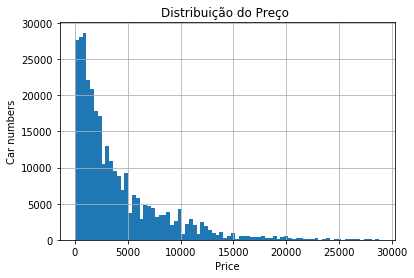

In [9]:
# Qual a distribuição do preco dos carros do dataset?
# A maioria dos carros para venda do site, tem preço até 5.000 

# Gerar Histograma
df.price.hist(bins = 80)
plt.xlabel("Price")
plt.ylabel("Car numbers")
plt.title("Distribuição do Preço ")
plt.show()


## Distribuição do Tipo de caixa

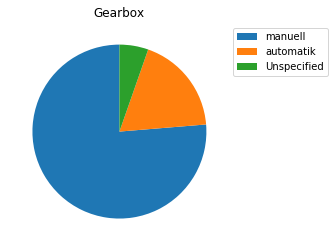

In [10]:
# Qual a distribuição do tipo de caixa dos carros do dataset?
# A grande maioria dos carros do dataset é manual

labels = df.gearbox.value_counts().index
num = len(df.model.value_counts().index)

# Gráfico de Pizza
fatias, texto = plt.pie(df.gearbox.value_counts(), startangle = 90)
plt.legend(fatias, labels, bbox_to_anchor = (1,1))
plt.title("Gearbox")
plt.show()

## Distribuicao da Idade do carro

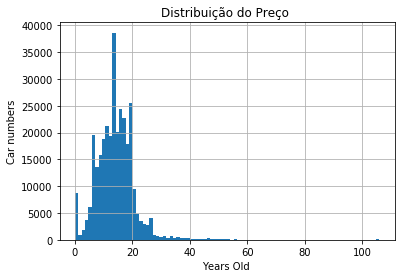

In [11]:
# Qual a distribuição de idade dos carros do dataset?
# A grande maioria dos carros tem idade até 20 anos

# Gerar Histograma
df.yearsOld.hist(bins = 90)

plt.xlabel("Years Old ")
plt.ylabel("Car numbers")
plt.title("Distribuição do Preço ")

plt.show()

## Distribuição de Veículos com base no Ano de Registro

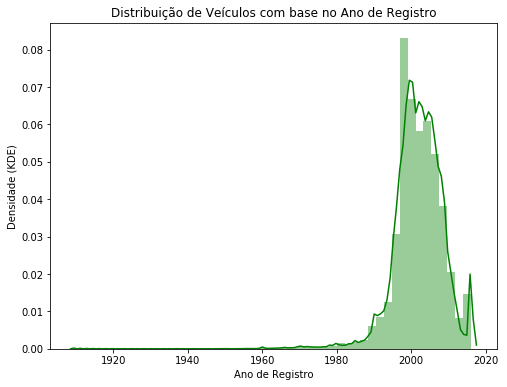

In [13]:
# Crie um Plot com a Distribuição de Veículos com base no Ano de Registro
fig, ax = plt.subplots(figsize=(8,6))
sns.distplot(df["yearOfRegistration"],color = 'green',kde=True)

ax.set_title('Distribuição de Veículos com base no Ano de Registro')
plt.ylabel("Densidade (KDE)")
plt.xlabel("Ano de Registro")
plt.show()

## Variação da faixa de preço pelo tipo de veículo

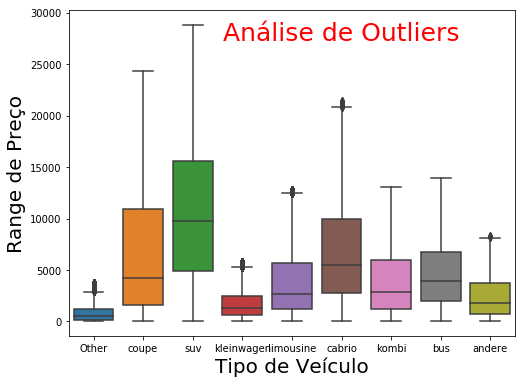

In [14]:
# Crie um Boxplot para avaliar os outliers

fig, ax = plt.subplots(figsize=(8,6)) # tamanho FIGURA

sns.boxplot(x="vehicleType", y="price", data=df) # colunas

ax.text(5,28000,"Análise de Outliers",fontsize=25,color="r",ha="center", va="center") # palavras no grafico

ax.xaxis.set_label_text("Tipo de Veículo",fontdict= {'size':20})
ax.yaxis.set_label_text("Range de Preço",fontdict= {'size':20})

plt.show()

## Contagem total de veículos à venda conforme o tipo de veículo

C:\Users\ruben\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\ruben\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


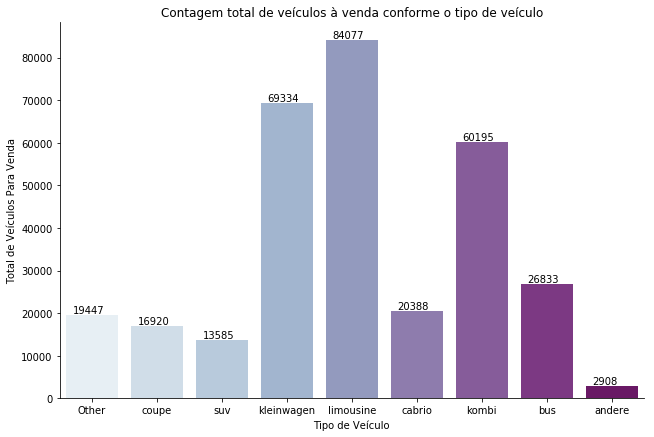

In [15]:
# Crie um Count Plot que mostre o número de veículos pertencentes a cada categoria 
#sns.set_style("white")

g = sns.factorplot(x="vehicleType", data=df, kind="count", palette="BuPu", size=6, aspect=1.5)

g.ax.xaxis.set_label_text("Tipo de Veículo")
g.ax.yaxis.set_label_text("Total de Veículos Para Venda")
g.ax.set_title("Contagem total de veículos à venda conforme o tipo de veículo")

# to get the counts on the top heads of the bar
for p in g.ax.patches:
    g.ax.annotate((p.get_height()), (p.get_x()+0.1, p.get_height()+500))

# ---------------------------------------------------

## Número de veículos pertencentes a cada marca

C:\Users\ruben\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\ruben\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


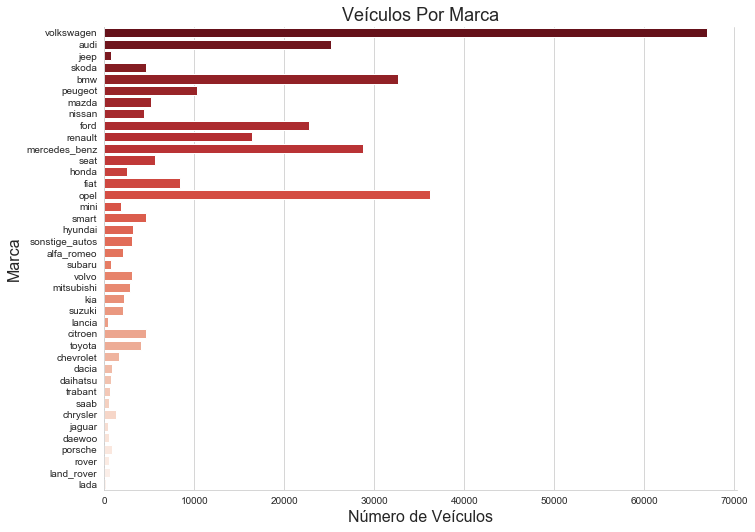

In [16]:
# Crie um Plot que mostre o número de veículos pertencentes a cada marca
sns.set_style("whitegrid")
g = sns.factorplot(y="brand", data=df, kind="count", palette="Reds_r", size=7, aspect=1.5)
g.ax.set_title("Veículos Por Marca",fontdict={'size':18})
g.ax.xaxis.set_label_text("Número de Veículos",fontdict= {'size':16})
g.ax.yaxis.set_label_text("Marca",fontdict= {'size':16})
plt.show()

## Preço médio dos veículos com base no tipo de veículo, bem como no tipo de caixa de câmbio

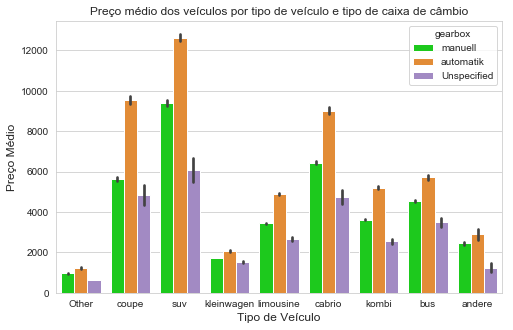

In [17]:
# Crie um Plot com o Preço médio dos veículos com base no tipo de veículo, bem como no tipo de caixa de câmbio
fig, ax = plt.subplots(figsize=(8,5))
colors = ["#00e600", "#ff8c1a","#a180cc"]
sns.barplot(x="vehicleType", y="price",hue="gearbox", palette=colors, data=df)
ax.set_title("Preço médio dos veículos por tipo de veículo e tipo de caixa de câmbio",fontdict= {'size':12})
ax.xaxis.set_label_text("Tipo de Veículo",fontdict= {'size':12})
ax.yaxis.set_label_text("Preço Médio",fontdict= {'size':12})
plt.show()

# ------------------------------------------------------------------------

## Preço médio do veículo por tipo de combustível e tipo de caixa de câmbio

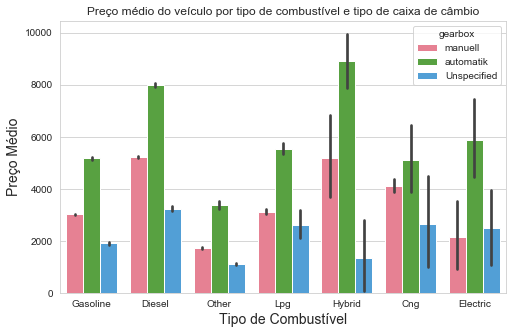

In [18]:
# Crie um Barplot com o Preço médio do veículo por tipo de combustível e tipo de caixa de câmbio
fig, ax = plt.subplots(figsize=(8,5))
colors = ["#00e600", "#ff8c1a","#a180cc"]
sns.barplot(x="fuelType", y="price",hue="gearbox", palette="husl",data=df)
ax.set_title("Preço médio do veículo por tipo de combustível e tipo de caixa de câmbio",fontdict= {'size':12})
ax.xaxis.set_label_text("Tipo de Combustível",fontdict= {'size':14})
ax.yaxis.set_label_text("Preço Médio",fontdict= {'size':14})
plt.show()

## Potência média de um veículo por tipo de veículo e tipo de caixa de câmbio

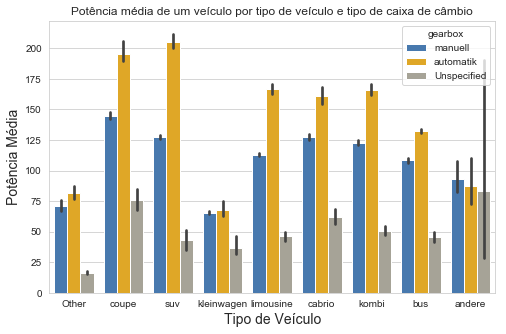

In [19]:
# Crie um Barplot com a Potência média de um veículo por tipo de veículo e tipo de caixa de câmbio
colors = ["windows blue", "amber", "greyish", "faded green", "dusty purple"]
fig, ax = plt.subplots(figsize=(8,5))
sns.set_palette(sns.xkcd_palette(colors))
sns.barplot(x="vehicleType", y="powerPS",hue="gearbox",data=df)
ax.set_title("Potência média de um veículo por tipo de veículo e tipo de caixa de câmbio",fontdict= {'size':12})
ax.xaxis.set_label_text("Tipo de Veículo",fontdict= {'size':14})
ax.yaxis.set_label_text("Potência Média",fontdict= {'size':14})
plt.show()

# ---------------------------------------------------------------------

In [21]:
# Calcule a média de preço por marca e por veículo
trial = pd.DataFrame()
for b in list(df["brand"].unique()):
    for v in list(df["vehicleType"].unique()):
        z = df[(df["brand"] == b) & (df["vehicleType"] == v)]["price"].mean()
        trial = trial.append(pd.DataFrame({'brand':b , 'vehicleType':v , 'avgPrice':z}, index=[0]))
trial = trial.reset_index()
del trial["index"]
trial["avgPrice"].fillna(0,inplace=True)
trial["avgPrice"].isnull().value_counts()
trial["avgPrice"] = trial["avgPrice"].astype(int)
trial.head(5)

,brand,vehicleType,avgPrice
0,volkswagen,Other,897
1,volkswagen,coupe,8014
2,volkswagen,suv,13946
3,volkswagen,kleinwagen,1626
4,volkswagen,limousine,3743


## Preço médio de um veículo por marca, bem como tipo de veículo

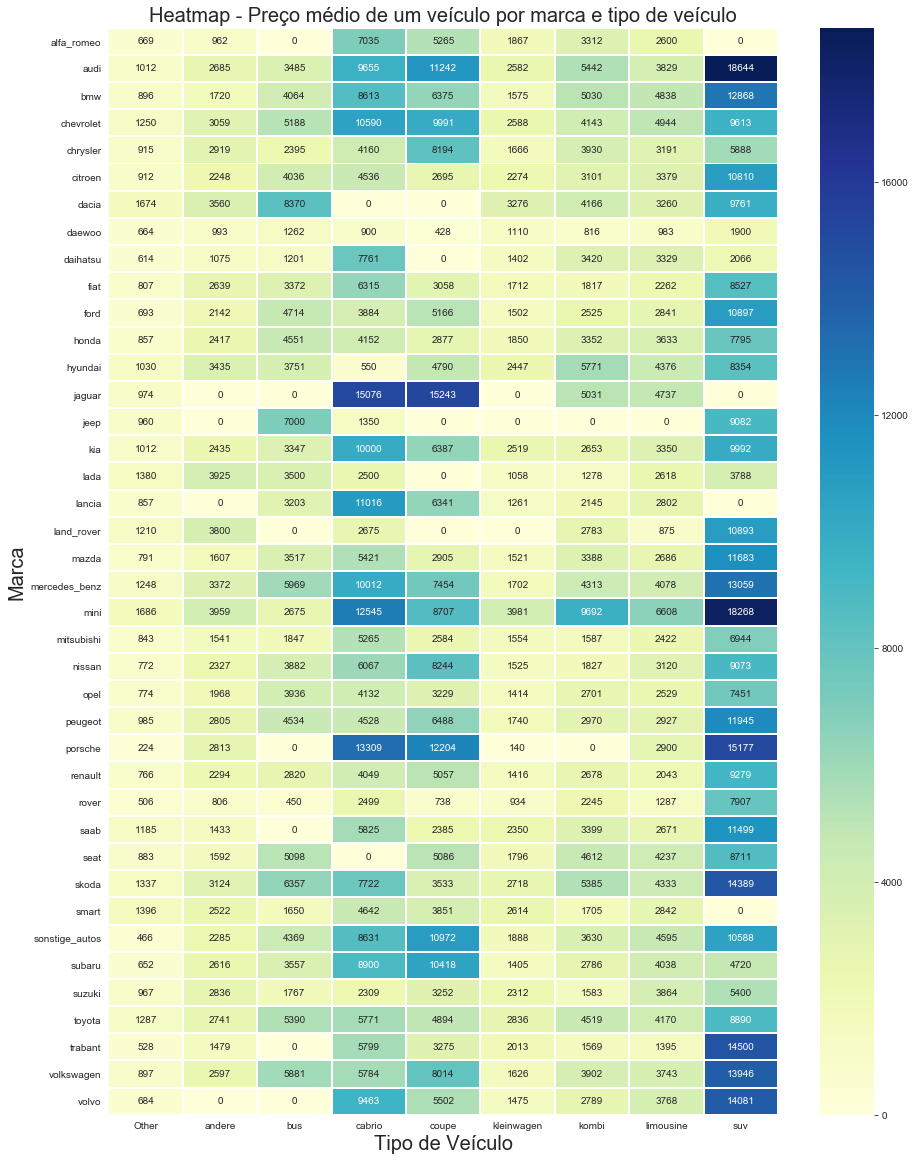

In [22]:
# Crie um Heatmap com Preço médio de um veículo por marca, bem como tipo de veículo
tri = trial.pivot("brand","vehicleType", "avgPrice")
fig, ax = plt.subplots(figsize=(15,20))
sns.heatmap(tri,linewidths=1,cmap="YlGnBu",annot=True, ax=ax, fmt="d")
ax.set_title("Heatmap - Preço médio de um veículo por marca e tipo de veículo",fontdict={'size':20})
ax.xaxis.set_label_text("Tipo de Veículo",fontdict= {'size':20})
ax.yaxis.set_label_text("Marca",fontdict= {'size':20})
plt.show()